<a href="https://colab.research.google.com/github/arnaldomariano/Digital_recognition/blob/main/Data_Analysis_Experimental_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Informações que serão retiradas das bases de dados.


1. Valor Total da Folha Salarial ->
    Calcularemos o gasto total com salários de funcionários pela empresa? <br>
    Para isso, calcularemos o salário total de cada funcionário somando-se (salário + benefícios + impostos) e somente depois       disso somaremos todos os salários.
    
    
2. Faturamento da empresa?<br>
    Para apurar o faturamento total da empresa calcularemos o faturamento de cada serviço e depois somaremos o faturamento         total.
    
    
3. O percentual de funcionários que já fechou algum contrato?<br>
    Na base de serviços temos o funcionário que fechou cada serviço. Mas devemos nos lembrar que nem todos os funcionários que     a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, usaremos a base de serviços e contaremos quantos             funcionários tem ali. Mas devemos nos lembrar que, cada funcionário só pode ser contado uma única vez.<br><br>
    Assim, se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() dará como resposta uma lista com todos os itens da coluna A aparecendo uma única vez. Todos os valores repetidos da coluna A serão excluidos da variável unicos_coluna A
    
    
4. Calcular o total de contratos que cada área da empresa já fechou.


5. Calcular o total de funcionários por área.


6. Calcular ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Lembramos que o método .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Para o caso de ocorrer algum erro de enconding, utilize-se das opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importando as bibliotecas:

Este código pode de inicio dar um erro, porque os valores estão separados por vírgula, quando no pandas o padrão é ponto.

In [3]:
import pandas as pd

funcionarios_df = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Experimental_Project-main/CadastroFuncionarios.csv', sep=";", decimal=",")
servicos_df = pd.read_excel('/content/drive/MyDrive/Data_Analysis_Experimental_Project-main/BaseServiçosPrestados.xlsx')
clientes_df = pd.read_csv('/content/drive/MyDrive/Data_Analysis_Experimental_Project-main/CadastroClientes.csv', sep=";", decimal=",")

# retirar colunas de estados civil e cargo do funcionário da tabela
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)

display(funcionarios_df)
display(servicos_df)
display(clientes_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


### 1- Cáculo de Folha Salarial

In [4]:
funcionarios_df['Salário Total'] = funcionarios_df['Salario Base']+funcionarios_df['Impostos']+funcionarios_df['Beneficios']+funcionarios_df['VT']+funcionarios_df['VR']
display(funcionarios_df)
display(f'O total da folha salarial mensal é de R$ {(funcionarios_df["Salário Total"].sum()):,}')

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salário Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


'O total da folha salarial mensal é de R$ 2,717,493.22'

### 2 - Faturamento da Empresa
O ideal é pegar sempre a tabela de valores unicos e adicona-la a outra tabela que pode conter valores repetidos. Sempre pega a tabela de  características e junta ela a tabela fatos.

Faturamentos_df = servicos_df.merge(clientes_df, on='ID Cliente') Esta é uma opção para juntar duas tabelas pequenas sem ter que selecionar apenas as colunas.

In [5]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
faturamentos_df['faturamento_total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
display(faturamentos_df)
display(f'O faturamento total é de R$ {(sum(faturamentos_df["faturamento_total"])):,}')

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,faturamento_total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


'O faturamento total é de R$ 5,519,160'

### 3- Percentual de Funcionários que fecharam contrato

In [6]:
func_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())
func_total = len(funcionarios_df['ID Funcionário'])
#display(func_fecharamcontrato)
#display(func_total)
print(f'A quantidade de funcionários que fecharam contrato foi de: {(func_fecharamcontrato/func_total):.2%}')

A quantidade de funcionários que fecharam contrato foi de: 86.84%


### 4-Total de contratos por área

,ID Funcionário,Area
0,67,Financeiro
1,17,Logística
2,116,Logística
3,37,Financeiro
4,130,Comercial
...,...,...
232,111,Operações
233,124,Comercial
234,72,Logística
235,90,Administrativo


,count
Area,
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


<Axes: xlabel='Area'>

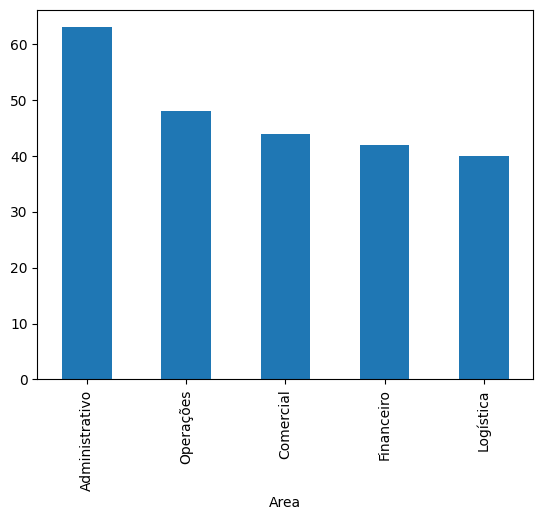

In [7]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
display(contratos_area_df)
contratos_area_qtde = contratos_area_df['Area'].value_counts()
display(contratos_area_qtde)
contratos_area_qtde.plot(kind='bar')

### 5-Total de funcionários por área

,count
Area,
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


<Axes: xlabel='Area'>

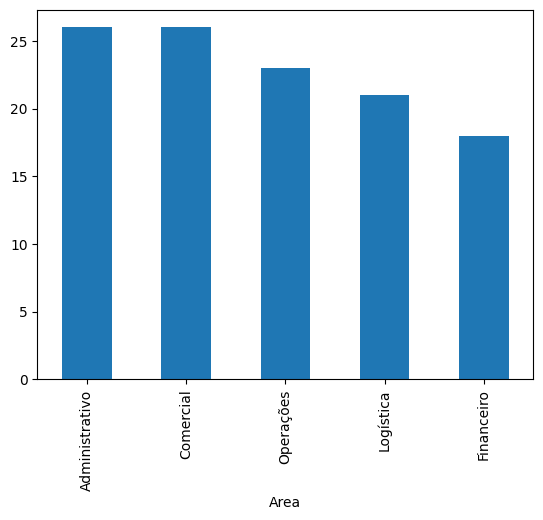

In [8]:
qtde_funcionarios_area = funcionarios_df['Area'].value_counts()
display(qtde_funcionarios_area)
qtde_funcionarios_area.plot(kind='bar')

### 6-Ticket médio mensal

In [9]:
ticket_médio = clientes_df['Valor Contrato Mensal'].mean()
print(f'O valor do Ticket Médio Mensal é de R$ {(ticket_médio):,.2f}')


O valor do Ticket Médio Mensal é de R$ 2,502.56
